In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB
 
from sklearn.datasets import fetch_openml

weather = datasets.fetch_openml(name='weather', version=2)
print('Features:',   weather.feature_names)
print('Target(s):',  weather.target_names)

Features: ['outlook', 'temperature', 'humidity', 'windy']
Target(s): ['play']


In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame( np.c_[weather.data, weather.target],columns=np.append(weather.feature_names, weather.target_names) )
df

,outlook,temperature,humidity,windy,play
0,sunny,85.0,85.0,True,no
1,sunny,80.0,90.0,True,no
2,overcast,83.0,86.0,True,yes
3,rainy,70.0,96.0,True,yes
4,rainy,68.0,80.0,True,yes
5,rainy,65.0,70.0,True,no
6,overcast,64.0,65.0,True,yes
7,sunny,72.0,95.0,True,no
8,sunny,69.0,70.0,True,yes
9,rainy,75.0,80.0,True,yes


In [ ]:
print('Values:')
print(df['outlook'])
print('\nFrequencies:')
print( df['outlook'].value_counts() )
print('\nFrequencies grouped by target:')
print( df.groupby(['play','outlook']).size() )

Values:
0        sunny
1        sunny
2     overcast
3        rainy
4        rainy
5        rainy
6     overcast
7        sunny
8        sunny
9        rainy
10       sunny
11    overcast
12    overcast
13       rainy
Name: outlook, dtype: object

Frequencies:
sunny       5
rainy       5
overcast    4
Name: outlook, dtype: int64

Frequencies grouped by target:
play  outlook 
no    rainy       2
      sunny       3
yes   overcast    4
      rainy       3
      sunny       2
dtype: int64


In [ ]:
print('Values:')
print(df['windy'])
print('\nFrequencies:')
print(df['windy'].value_counts())
print('\nFrequencies grouped by target:')
print( df.groupby(['play','windy']).size() )


Values:
0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: windy, dtype: object

Frequencies:
True    14
Name: windy, dtype: int64

Frequencies grouped by target:
play  windy
no    True     5
yes   True     9
dtype: int64


In [ ]:
print('Values:')
print(df['play'])
print('\nFrequencies:')
print(df['play'].value_counts())

Values:
0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object

Frequencies:
yes    9
no     5
Name: play, dtype: int64


In [ ]:
print( 'Instances where play=yes:')
print( df.query('play == "yes"') )
meanYtemp = df.query('play == "yes"').temperature.mean()
stdYtemp  = df.query('play == "yes"').temperature.std()
print( '\nmean temperature (play=yes) ={:10.6f}'.format(meanYtemp) )
print( ' std temperature (play=yes) ={:10.6f}'.format( stdYtemp) )
print( '\nInstances where play=no:')
print( df.query('play == "no"') )
meanNtemp = df.query('play == "no"').temperature.mean()
stdNtemp  = df.query('play == "no"').temperature.std()
print( '\nmean temperature (play=no)  ={:10.6f}'.format(meanNtemp) )
print( ' std temperature (play=no)  ={:10.6f}'.format( stdNtemp) )


Instances where play=yes:
     outlook temperature humidity windy play
2   overcast        83.0     86.0  True  yes
3      rainy        70.0     96.0  True  yes
4      rainy        68.0     80.0  True  yes
6   overcast        64.0     65.0  True  yes
8      sunny        69.0     70.0  True  yes
9      rainy        75.0     80.0  True  yes
10     sunny        75.0     70.0  True  yes
11  overcast        72.0     90.0  True  yes
12  overcast        81.0     75.0  True  yes

mean temperature (play=yes) = 73.000000
 std temperature (play=yes) =  6.164414

Instances where play=no:
   outlook temperature humidity windy play
0    sunny        85.0     85.0  True   no
1    sunny        80.0     90.0  True   no
5    rainy        65.0     70.0  True   no
7    sunny        72.0     95.0  True   no
13   rainy        71.0     91.0  True   no

mean temperature (play=no)  = 74.600000
 std temperature (play=no)  =  7.893035


In [ ]:
print( 'Instances where play=yes:')
print( df.query('play == "yes"') )
meanYhumd = df.query('play == "yes"').humidity.mean()
stdYhumd  = df.query('play == "yes"').humidity.std()
print( '\nmean humidity (play=yes) ={:10.6f}'.format(meanYhumd) )
print( ' std humidity (play=yes) ={:10.6f}'.format( stdYhumd) )
print( '\nInstances where play=no:')
print( df.query('play == "no"') )
meanNhumd = df.query('play == "no"').humidity.mean()
stdNhumd  = df.query('play == "no"').humidity.std()
print( '\nmean humidity (play=no)  ={:10.6f}'.format(meanNhumd) )
print( ' std humidity (play=no)  ={:10.6f}'.format( stdNhumd) )

Instances where play=yes:
     outlook temperature humidity windy play
2   overcast        83.0     86.0  True  yes
3      rainy        70.0     96.0  True  yes
4      rainy        68.0     80.0  True  yes
6   overcast        64.0     65.0  True  yes
8      sunny        69.0     70.0  True  yes
9      rainy        75.0     80.0  True  yes
10     sunny        75.0     70.0  True  yes
11  overcast        72.0     90.0  True  yes
12  overcast        81.0     75.0  True  yes

mean humidity (play=yes) = 79.111111
 std humidity (play=yes) = 10.215729

Instances where play=no:
   outlook temperature humidity windy play
0    sunny        85.0     85.0  True   no
1    sunny        80.0     90.0  True   no
5    rainy        65.0     70.0  True   no
7    sunny        72.0     95.0  True   no
13   rainy        71.0     91.0  True   no

mean humidity (play=no)  = 86.200000
 std humidity (play=no)  =  9.731393


In [ ]:
category_columns = ['outlook', 'windy', 'play']
df[ category_columns] = df[ category_columns].apply(lambda x: pd.factorize(x)[0])
df

,outlook,temperature,humidity,windy,play
0,0,85.0,85.0,0,0
1,0,80.0,90.0,0,0
2,1,83.0,86.0,0,1
3,2,70.0,96.0,0,1
4,2,68.0,80.0,0,1
5,2,65.0,70.0,0,0
6,1,64.0,65.0,0,1
7,0,72.0,95.0,0,0
8,0,69.0,70.0,0,1
9,2,75.0,80.0,0,1


In [ ]:
model = GaussianNB()
x = df.loc[:,:'play']
y = df.loc[:,'play']
model.fit(x, y)
print( 'Model parameters:', model.get_params() )

Model parameters: {'priors': None, 'var_smoothing': 1e-09}


In [ ]:
expected = y
predicted = model.predict(x)
print('Actual:',    expected)
print('Predicted:', predicted)

Actual: 0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64
Predicted: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
def pdFunc(power, mean, std, val):
    a = 1/(np.sqrt(2*np.pi)*std)
    diff = np.abs(np.power(val-mean, power))
    b = np.exp(-(diff)/(2*std*std))
    return a*b

In [ ]:
likelihoodYes = 2/9 * pdFunc(2,meanYtemp,stdYtemp,77) * pdFunc(2,meanYhumd,stdYhumd,43) * 9/9
print( 'Likelihood(play=yes|E) = {:.8f}'.format(likelihoodYes) )

Likelihood(play=yes|E) = 0.00000088


In [ ]:
likelihoodNo = 3/5 * pdFunc(2,meanNtemp,stdNtemp,77) * pdFunc(2,meanNhumd,stdNhumd,43) * 5/5
print( 'Likelihood(play=no|E) = {:.8f}'.format(likelihoodNo) )

Likelihood(play=no|E) = 0.00000006


In [ ]:
print( 'Probability(play=yes|E) = {:.8f}'.format(likelihoodYes/(likelihoodYes+likelihoodNo)) )

Probability(play=yes|E) = 0.93381971


In [ ]:
print( 'Probability(play=no|E) = {:.8f}'.format(likelihoodNo/(likelihoodYes+likelihoodNo)) )

Probability(play=no|E) = 0.06618029


Accuracy = 1.0
Cohen kappa = 1.0
Precision = [1. 1.]
Recall = [1. 1.]

Metrics = (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([5, 9]))

PERFORMANCE REPORT:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

CONFUSION MATRIX:



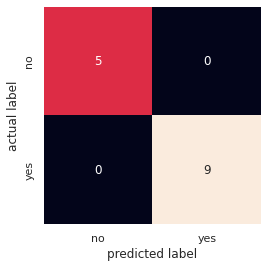

In [ ]:
print('Accuracy =', metrics.accuracy_score(expected, predicted))
print('Cohen kappa =', metrics.cohen_kappa_score(expected, predicted))
print('Precision =', metrics.precision_score(expected, predicted, average=None))
print('Recall =', metrics.recall_score(expected, predicted, average=None))
print()
print('Metrics =', metrics.precision_recall_fscore_support(expected, predicted, average=None))
print('\nPERFORMANCE REPORT:\n')
print(metrics.classification_report(expected, predicted))
print('CONFUSION MATRIX:\n')

from sklearn.metrics import confusion_matrix
import seaborn as sns; 
sns.set()
import matplotlib.pyplot as plt

mat = confusion_matrix(expected, predicted)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['no','yes'], yticklabels=['no','yes'])
plt.xlabel('predicted label')
plt.ylabel('actual label');